In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from analysis.tools import ffschema, sidm_processor
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 

<module 'analysis.tools.sidm_processor' from '/home/cms-jovyan/SIDM/analysis/studies/../../analysis/tools/sidm_processor.py'>

In [2]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
sample_name1 = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4"
sample_name2 = "SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7"
sample_name3 = "SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2"
sample_name4 = "SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8"
sample_name5 = "SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5"
sample_name6 = "SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4"
sample_file1 = f"{sample_dir}/{sample_name1}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155809/0000/ffNtuple_1.root"
sample_file2 = f"{sample_dir}/{sample_name2}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155637/0000/ffNtuple_1.root"
sample_file3 = f"{sample_dir}/{sample_name3}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155722/0000/ffNtuple_1.root"
sample_file4 = f"{sample_dir}/{sample_name4}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_160450/0000/ffNtuple_1.root"
sample_file5 = f"{sample_dir}/{sample_name5}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_153128/0000/ffNtuple_1.root"
sample_file6 = f"{sample_dir}/{sample_name6}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_154240/0000/ffNtuple_1.root"



events1 = NanoEventsFactory.from_root(
    sample_file4,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name4, 
    },
).events()
print(events1)


[{run: 1, event: 18753, lumi: 151, fixedGridRho: 5.99, ... t: 200}}]}]


In [3]:
channels = ["2mu2e", "4mu", "base", "noLjPtCut"]
hists = ["base_plus_gen"]
p = sidm_processor.SidmProcessor([channels[0]], hists)
out = p.process(events1)

In [4]:
ak.fields(events1.gen)

['charge',
 'pid',
 'daupid',
 'daudr',
 'posx',
 'posy',
 'posz',
 'dauposdr',
 'dauposdz',
 'dauposdphi',
 'dauvtx',
 'vtx',
 'p4']

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd1087c4190>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

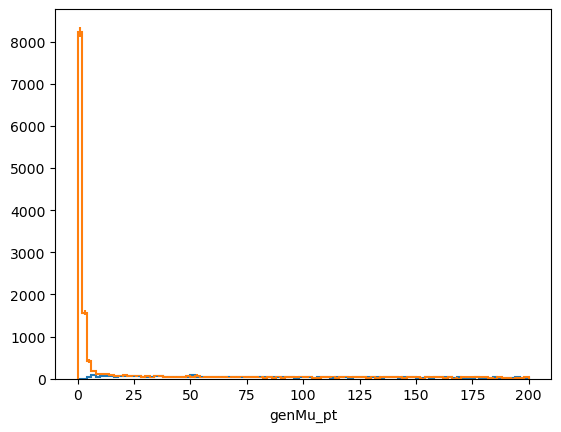

In [5]:
ch = channels[0]
hists = out[sample_name4]["hists"]
hists["genMu_pt"][ch, :].plot()
hists["muon_pt"][ch, :].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd1086ed730>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

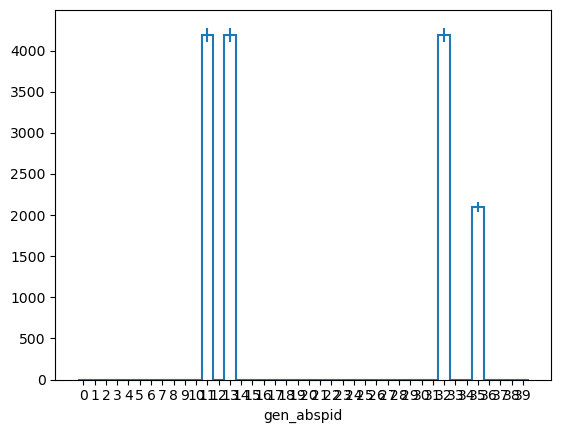

In [6]:
ch = channels[0]
hists = out[sample_name4]["hists"]
hists["gen_abspid"][ch, :].plot()


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd1085d04f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

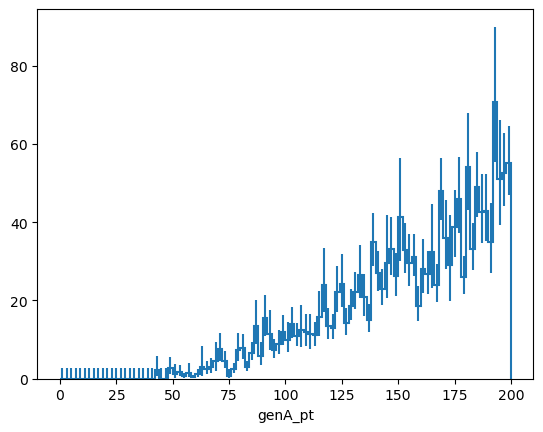

In [7]:
ch = channels[0]
hists = out[sample_name4]["hists"]
hists["genA_pt"][ch, :].plot()